In [1]:
import pandas as pd
import seaborn as sns
results = pd.read_csv('results.csv', index_col=None)
for name in ['_no_block', '_cbh', '_degree']:
    results['total' + name] = sum(results[str(i)+name] for i in range(1, 4))
results.head()
sns.set()
print(results.columns)

Index(['network_name', 'threshold', 'seed_size', 'budget_total', 'budget_1',
       'budget_2', '0_no_block', '1_no_block', '2_no_block', '3_no_block',
       '0_cbh', '1_cbh', '2_cbh', '3_cbh', '0_degree', '1_degree', '2_degree',
       '3_degree', 'total_no_block', 'total_cbh', 'total_degree'],
      dtype='object')


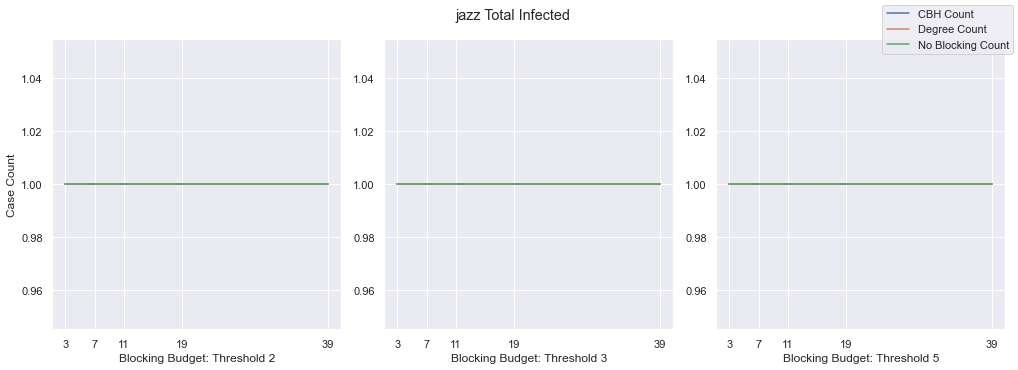

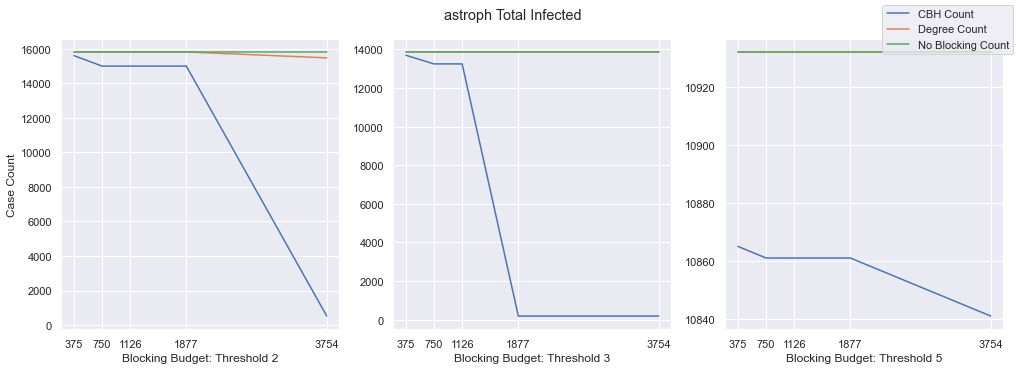

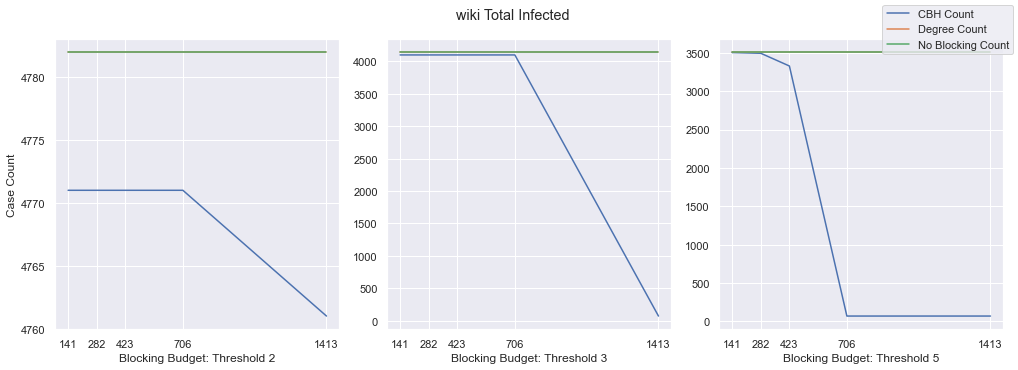

In [2]:
import matplotlib.pyplot as plt
import numpy as np
names = ['jazz', 'astroph', 'wiki']
thres = [2, 3, 5]

for name in names:
    threshold = results[results.network_name == name]
    fig, ax = plt.subplots(1,3, figsize=(14, 5))
    fig.suptitle(name + " Total Infected")
    for i in range(len(thres)):
        subdf = threshold[threshold.threshold == thres[i]]
#         subdf = subdf[subdf.seed_size == 20]
        cbh, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_cbh)[:-1])
        degree, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_degree)[:-1])
        no_block, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_no_block)[:-1])
        ax[i].set_xticks(list(subdf.budget_total)[:-1])
    fig.tight_layout(pad=1)
    fig.legend([cbh, degree, no_block], ['CBH Count', "Degree Count", "No Blocking Count"])
    for i in range(3):
        ax[i].set_xlabel("Blocking Budget: Threshold " + str(thres[i]))
    ax[0].set_ylabel("Case Count")
    plt.savefig("infected_cnt_" + name + ".pdf")